In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

from itertools import product
import warnings
warnings.filterwarnings('ignore')

from train import trainer
from utills import load_and_generte

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# setup
f_load = pd.read_csv('1년치 소비데이터.csv')
# f_load= (f_load['total']/100).astype("int")

f_generation = pd.read_csv("태양광데이터1.csv",encoding='cp949')
# f_generation = f_generation[0:365]

start_day = 0 # 시작
end_day = 30 #int(365 * 0.8) # 80% train 사용
pos_name = '영암에프원태양광b' # 사용할 발전기명

T = np.identity(n=24, dtype=np.uint8) # 시간 인코딩
# T = np.array(pd.get_dummies(np.array([0,1,2,3,4,5,6,7,8,9,10,11,
#                                       12,13,14,15,16,17,18,19,20,21,22,23])))

# 여름 겨울 단위 전기료 가격?
winter_TOU = [5,5,5, 5,5,5, 5,15,15, 15,25,10, 10,10,10, 10,10,15, 15,5,5, 5,5,5]  # 겨울
summer_TOU = [5,5,5, 5,5,5, 5,10,10 ,10,10,15, 15,15,15, 15,15,10, 10,5,5,5,5,5]  #여름

# parameters
start_size = 3650
learning_rate = 0.0001
gamma = 0.98 # discount rate
Tf= 0 #미래 지수?
feature = 52 + 2*Tf # 52 + Tf*2
battery_max = 40 # 배터리 용량 
freq = 20 # target 모델 업데이트 폭
iteration = 5000 # 반복
pD=30 # ??

from utills import load_and_generte
days = end_day-start_day

# load, generation 데이터 형성
load_data, generation_data = load_and_generte(f_load, f_generation, pos_name, start_day, end_day)

In [5]:
len(load_data)

30

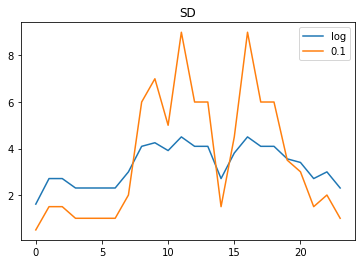

In [4]:
# sd plot 비교
day_load = load_data[0]
plt.plot(np.log(day_load * summer_TOU), label='log')
plt.plot(day_load * summer_TOU * 0.1, label='0.1')
plt.legend()
plt.title("SD")
plt.show()

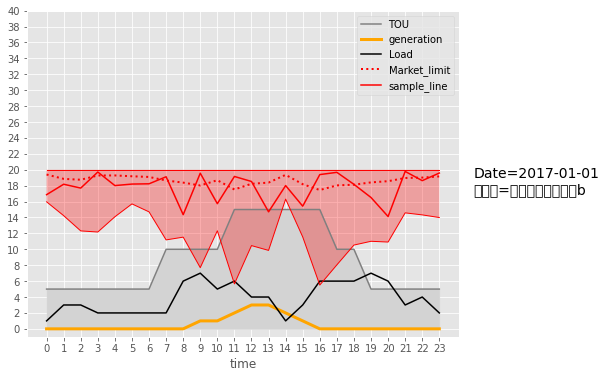

In [30]:
# charge graph
plt.figure(figsize=(8,6))
with plt.style.context('ggplot'):
    for i in range(1):
        x = range(0, 24)
        y1 = [v for v in load_data[i]]
        y3 = [v for v in summer_TOU[0:24]]
        y5 = [v for v in generation_data[i]]
        day_load = load_data[0]
        sd = np.log(day_load * summer_TOU)
        gen_limit = [np.clip(np.random.normal(20, sd[i], 100), a_min=0, a_max=20) for i in range(24)]
        gen_max = np.vstack(gen_limit).max(axis=1)
        gen_min = np.vstack(gen_limit).min(axis=1)
        gen_mean = np.vstack(gen_limit).mean(axis=1)
        
        limit_market = [np.random.normal(20, sd[i], 1) for i in range(24)] 
        limit_market = [40 - time if time >= 20 else time for time in limit_market]
        plt.plot(x, y3, label='TOU', color='gray')
        plt.fill_between(x[0:24], y3[0:24], color='lightgray')

        plt.plot(x, y5, linewidth=3 ,label='generation', color='orange')

        plt.plot(x, y1,'-', label='Load', color='black')
        
        plt.plot(gen_min, 'r', linewidth=1)
        plt.plot(gen_max, 'r', linewidth=1)
        plt.plot(gen_mean, 'r:', label='Market_limit', linewidth=2)
        plt.fill_between(x, np.vstack(gen_limit).min(axis=1), np.vstack(gen_limit).max(axis=1), facecolor='r', alpha=0.3)
        plt.plot(limit_market, 'r-', label="sample_line")
        
        textstr = 'Date={}\n발전소={}\n'.format(str(f_generation.loc[i, '년월일']), pos_name)
        plt.text(25, 15, textstr, fontsize=14)
        plt.xticks(np.arange(0, 24))
        plt.yticks([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40])
        plt.xlabel('time',fontsize=12)
        #plt.ylabel('kW',fontsize=12)
        plt.grid(True)
        plt.legend()
        plt.subplots_adjust(left=0.15)
        plt.show()

In [32]:
day_load = load_data[0]
sd = np.log(day_load * summer_TOU)
gen_limit = [np.random.normal(20, sd[i], 1) for i in range(24)] 
gen_limit = [40 - time if time >= 20 else time for time in gen_limit]